In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import axes3d

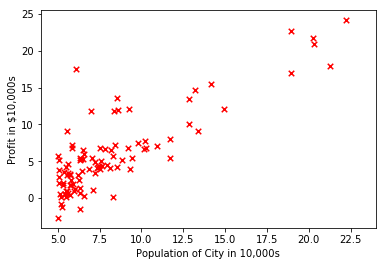

In [2]:
# Linear regression with single variable
data = np.loadtxt('data/ex1data1.txt', delimiter=',')

X = np.c_[np.ones(data.shape[0]), data[:, 0]]
y = np.c_[data[:, 1]]

plt.scatter(X[:, 1], y, s=30, c='r', marker='x', linewidths=1)
plt.xlim(4, 24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')

In [3]:
# Compute cost
def compute_cost(X, y, theta=[[0], [0]]):
    m = y.size # the number of training examples
    h = X.dot(theta) # the prediction
    
    J = np.sum(np.square(h - y)) / (2*m) # use sum of mean squared error

    return J

In [4]:
compute_cost(X, y)

32.072733877455676

In [5]:
def gradient_descent(X, y, theta=[[0], [0]], alpha=0.01, epochs=1500):
    m = y.size
    J = np.zeros(epochs)
    
    for epoch in range(epochs):
        h = X.dot(theta)
        theta = theta - alpha * (1 / m) * (X.T.dot(h-y))
        J[epoch] = compute_cost(X, y, theta)
    
    return (theta, J)

The final theta [-3.63029144  1.16636235]


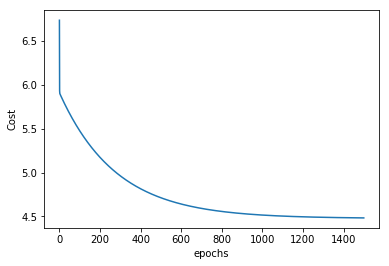

In [6]:
theta, J = gradient_descent(X, y)
print('The final theta', theta.ravel())

plt.plot(J)
plt.ylabel('Cost')
plt.xlabel('epochs');

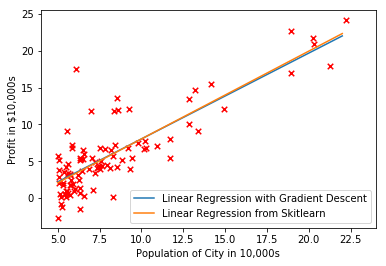

In [7]:
xv = np.arange(5, 23)
yv = theta[0] * 1 + theta[1] * xv

# Plot the results from gradient descent
plt.scatter(X[:, 1], y, s=30, c='r', marker='x', linewidths=1)
plt.plot(xv, yv, label='Linear Regression with Gradient Descent')

# Compare with the result generated from skit-learn
regr = LinearRegression()
regr.fit(X[:, 1].reshape(-1, 1), y.ravel())
plt.plot(xv, regr.intercept_+regr.coef_*xv, label='Linear Regression from Skitlearn')

plt.xlim(4, 24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc=4)

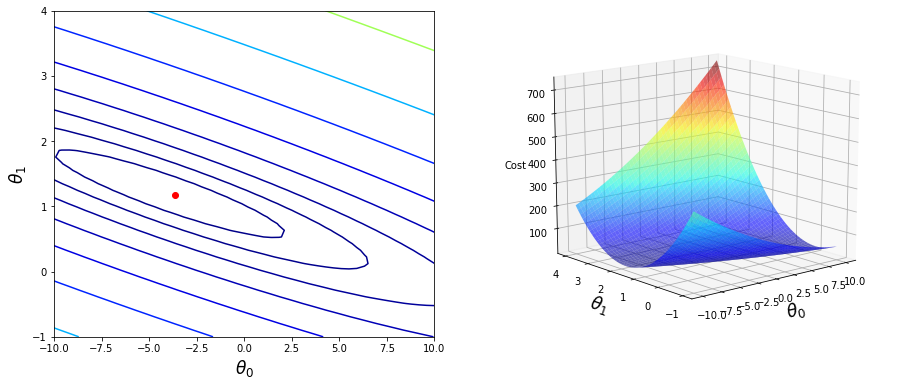

In [8]:
# Create grid coordinates for plotting
theta0 = np.linspace(-10, 10)
theta1 = np.linspace(-1, 4)

xv, yv = np.meshgrid(theta0, theta1, indexing='xy')
Z = np.zeros((theta0.size, theta1.size)) # 50 x 50

# Calculating Z-values based on grid of coefficients
# index in the form of (i, j)
for index, v in np.ndenumerate(Z):
    Z[index] = compute_cost(X, y, theta=[[xv[index]], [yv[index]]])
    
fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot - contour
contour = ax1.contour(xv, yv, Z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
ax1.scatter(theta[0], theta[1], c='r')

# Right plot
ax2.plot_surface(xv, yv, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
ax2.set_zlabel('Cost')
ax2.set_zlim(Z.min(), Z.max())
ax2.view_init(elev=15, azim=230)

# Settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=17)
    ax.set_ylabel(r'$\theta_1$', fontsize=17)